# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [149]:
data = pd.read_csv('/Users/jorgesalazar/Documents/BTS/CDA/banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [3]:
data.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [4]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [ ]:
To solve this problem, I will string replace and save it in the column

In [150]:
data['education'] = pd.Series(data['education']).str.replace('basic...','basic')
        

In [18]:
data['education']

0                      basic
1                    unknown
2          university.degree
3                high.school
4                      basic
5                      basic
6                      basic
7                      basic
8          university.degree
9                      basic
10         university.degree
11         university.degree
12         university.degree
13               high.school
14               high.school
15               high.school
16               high.school
17         university.degree
18                     basic
19                     basic
20                     basic
21                   unknown
22         university.degree
23       professional.course
24               high.school
25         university.degree
26                   unknown
27               high.school
28                     basic
29                     basic
                ...         
41158            high.school
41159            high.school
41160      university.degree
41161         

In [19]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


##### Analyse the distribution of the target variable

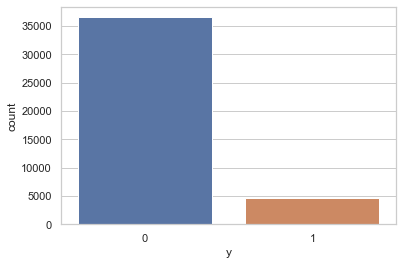

In [23]:
graph = sns.countplot('y', data=data)


In [38]:
table = data['y'].value_counts()
table = table.to_frame()

In [43]:
table

,y
0,36548
1,4640


In [44]:
table['count'] = (table['y'] / len(data))*100

In [46]:
table.columns = ['count','perc']

In [47]:
table

,count,perc
0,36548,88.734583
1,4640,11.265417


In [48]:
table['y'] = [0,1]
table

,count,perc,y
0,36548,88.734583,0
1,4640,11.265417,1


In [49]:
table = table.reindex(columns=['y','count','perc'])
table

,y,count,perc
0,0,36548,88.734583
1,1,4640,11.265417


##### What can we observe about the distribution of the target variable

Reply here...

In [ ]:
88% of the clients are not suscribed to a term deposit

##### Observe how the different numeric variables behave for the 2 classes

In [84]:
num_var = data.groupby('y').mean()
num_var

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


# Observations:
- It is very noticable that the longer the duration of the call, the more likely it will be a purchase
- from pdays, we have seen the data that if the value is 999 means that the client was not previously called, and for not purchase, the mean of pdays is very close to 999 which means that most clients that didnt do the purchase, they were not called previously
- 

##### Analyse other variables - Make some plots and discuss them

In [63]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [66]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

- **Job title**

In [133]:
table4 = pd.crosstab(data['job'],data['y'])
table4

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


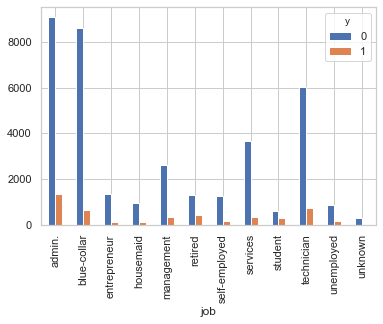

In [134]:
table4.plot(kind='bar')

In [136]:
table5 = pd.crosstab(data['job'],data['y'],margins=True)
table5[0] = table5[0]/table5['All']
table5[1] = table5[1]/table5['All']
table5

y,0,1,All
job,,,
admin.,0.870274,0.129726,10422
blue-collar,0.931057,0.068943,9254
entrepreneur,0.914835,0.085165,1456
housemaid,0.900000,0.100000,1060
management,0.887825,0.112175,2924
retired,0.747674,0.252326,1720
self-employed,0.895144,0.104856,1421
services,0.918619,0.081381,3969
student,0.685714,0.314286,875


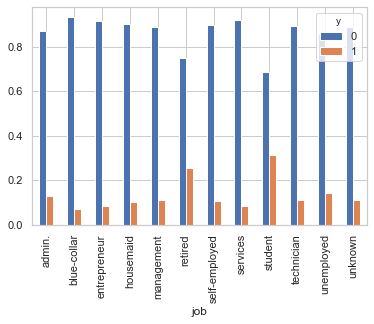

In [137]:
table5.drop('All',inplace=True)
table5.plot(y=[0,1], kind='bar')

- Comment the plots

In [ ]:
students are the most likely to do a purchase even the rest of the jobs and between students
there is a high purchase ratio, on the other hand, blue collar and entrepeneurs are the less
likely to do purchases

- **Marital status**

In [123]:
table3 = pd.crosstab(data['marital'],data['y'],margins=True)

In [124]:
table3[0] = table3[0]/table3['All']
table3[1] = table3[1]/table3['All']
table3

y,0,1,All
marital,,,
divorced,0.896791,0.103209,4612
married,0.898427,0.101573,24928
single,0.859959,0.140041,11568
unknown,0.850000,0.150000,80
All,0.887346,0.112654,41188


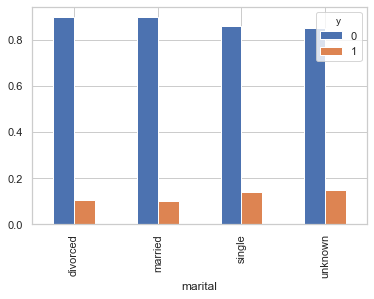

In [132]:
table3.drop('All',inplace=True)
table3.plot(y=[0,1], kind='bar')

- Comment the plots

In [ ]:
there is not much variation or influence on the marital status to determine if there will be 
a purchase or not

- **Education**

In [138]:
table6 = pd.crosstab(data['education'],data['y'],margins=True)
table6

y,0,1,All
education,,,
basic,11424,1089,12513
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [139]:
table6[0] = table6[0]/table6['All']
table6[1] = table6[1]/table6['All']
table6

y,0,1,All
education,,,
basic,0.912971,0.087029,12513
high.school,0.891645,0.108355,9515
illiterate,0.777778,0.222222,18
professional.course,0.886515,0.113485,5243
university.degree,0.862755,0.137245,12168
unknown,0.854997,0.145003,1731
All,0.887346,0.112654,41188


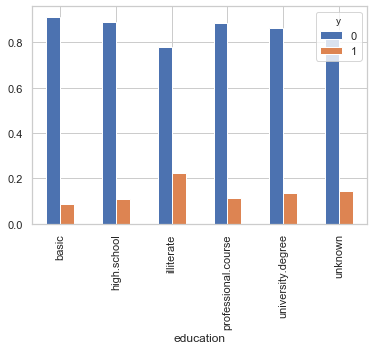

In [141]:
table6.drop('All',inplace=True)
table6.plot(y=[0,1], kind='bar')

- Comment the plots

In [ ]:
illiterate people have the highest probability to do a purchase, although it is still kind of 
low. On the other hand, basic educated people, are the less likely to do a purchase

- **Day of Week**

In [142]:
table7 = pd.crosstab(data['day_of_week'],data['y'],margins=True)
table7[0] = table7[0]/table7['All']
table7[1] = table7[1]/table7['All']
table7

y,0,1,All
day_of_week,,,
fri,0.891913,0.108087,7827
mon,0.900517,0.099483,8514
thu,0.878812,0.121188,8623
tue,0.882200,0.117800,8090
wed,0.883329,0.116671,8134
All,0.887346,0.112654,41188


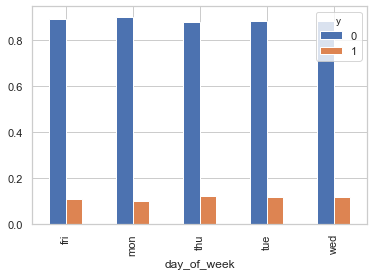

In [143]:
table7.drop('All',inplace=True)
table7.plot(y=[0,1], kind='bar')

- Comment the plots

In [ ]:
there is no influence on the day of the week to determine if there will be a purchase by the
client or not

- **Month**

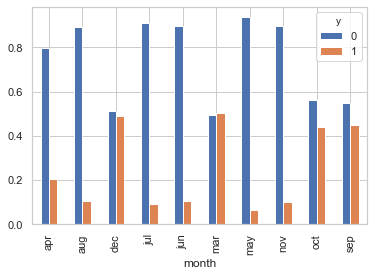

In [144]:
table8 = pd.crosstab(data['month'],data['y'],margins=True)
table8[0] = table8[0]/table8['All']
table8[1] = table8[1]/table8['All']
table8.drop('All',inplace=True)
table8.plot(y=[0,1], kind='bar')

- Comment the plots

In [ ]:
there are some intersting variations on the purchase frequency depending on the month. December,
march, october and september have kind of an even probability of doing a purchase or not. But on may
and november for example, there is a very low probability of doing a purchase

- **poutcome**

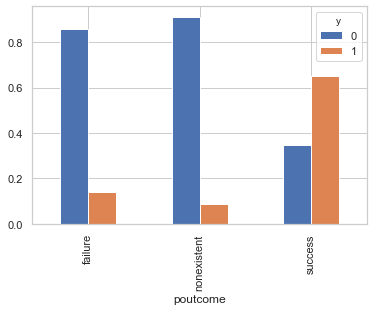

In [145]:
table9 = pd.crosstab(data['poutcome'],data['y'],margins=True)
table9[0] = table9[0]/table9['All']
table9[1] = table9[1]/table9['All']
table9.drop('All',inplace=True)
table9.plot(y=[0,1], kind='bar')

- Comment the plots

### Create dummy variables

In [152]:
data2 = pd.get_dummies(data, columns=['poutcome'],drop_first=True)
data2.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,1


### Implement the Logistic Regression Model

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [166]:
data2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

##### Prepare the dataset for training

In [169]:

X =  data2[['age','duration','poutcome_nonexistent','poutcome_success']]
y =  data2['y']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=0)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [174]:
y_pred = logmodel.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9093631140244396


##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


Even though it is important to know the accuracy, to have a more explicit and deep model evaluation, it is needed to know also the recall and the precision score. This is because of balancing or imbalacing dataset





The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

In [187]:
metrics.confusion_matrix(y_test,y_pred)

array([[10761,   220],
       [  900,   476]])

**Is our model obtaining good results or is it failing in some specific case?**

The model is giving a lot of false positives



##### Compute other metrics using classification report

In [20]:
# Put your code here

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.68      0.41      0.51      1376

    accuracy                           0.91     12357
   macro avg       0.81      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [190]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     10981\n           1       0.68      0.35      0.46      1376\n\n    accuracy                           0.91     12357\n   macro avg       0.80      0.66      0.70     12357\nweighted avg       0.90      0.91      0.90     12357\n'

#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?
                                            $\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.
                                            $\frac{TP}{TP+FN}$                                            

In [188]:
476/(476+220)

0.6839080459770115

In [189]:
476/(476+900)

0.34593023255813954

## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

Reply here...



In [ ]:
When training the data, if we give an imbalanced data, the learning part is specifically trained
to predict a certain outcome because there are a lot of examples for that outcome. On the other hand
there are very few examples for the other outcome, thus the training is poor and cannot predict properly



During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


##### To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [183]:
X = data2[['age','duration','poutcome_nonexistent','poutcome_success']]
y = data2['y']

##### Apply SMOTE to generate synthetic data

In [191]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=0)

columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X,os_data_y= os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [47]:
# Put your code here

,y,count,perc
0,0,25567,50.0
1,1,25567,50.0


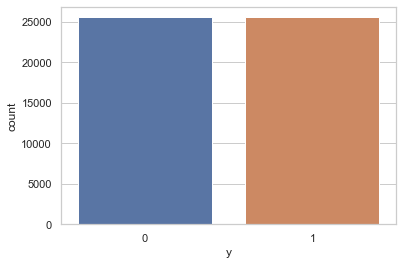

In [192]:
sns.countplot(x='y',data=os_data_y)

They are prefectly distributed!!

##### Implement the model

In [193]:
# Prepare thedata qith the oversampled dataset
X = os_data_X
y = os_data_y

# Create training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

#Fit the model
logreg.fit(X_train, y_train)

/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [194]:
#Compute predictions
y_pred = logreg.predict(X_test)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [195]:
metrics.confusion_matrix(y_test,y_pred)

array([[6228, 1438],
       [1505, 6170]])

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [196]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81      7666\n           1       0.81      0.80      0.81      7675\n\n    accuracy                           0.81     15341\n   macro avg       0.81      0.81      0.81     15341\nweighted avg       0.81      0.81      0.81     15341\n'

The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

In [ ]:
As mentioned before, having an unbalanced data will not create a proper training and thus the
predictions will not have a good precision and recall score. With SMOTE, it was possible to
balance the data and have a good training. As we can see the classification report, the score
of precision and recall are way better.